In [114]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [42]:
df = pd.read_csv(r"C:\Users\15521\Desktop\Deep Learning\HW2\RNN\HistoricalPrices.csv")

In [43]:
df

,Date,Open,High,Low,Close
0,1/2/1985,165.37,167.12,165.25,165.37
1,1/3/1985,164.57,166.07,164.44,164.57
2,1/4/1985,163.68,164.56,163.43,163.68
3,1/7/1985,164.24,164.62,163.74,164.24
4,1/8/1985,163.99,164.49,163.99,163.99
5,1/9/1985,165.18,165.56,164.06,165.18
6,1/10/1985,168.31,168.31,165.06,168.31
7,1/11/1985,167.91,168.66,167.66,167.91
8,1/14/1985,170.51,170.51,167.64,170.51
9,1/15/1985,170.81,171.81,170.44,170.81


In [45]:
training_set = df.iloc[:7817, 1:2].values
test_set = df.iloc[7817:, 1:2].values

In [67]:
for idx, val in enumerate(training_set_scaled):
    print(idx , " ", val)

0   [0.00085932]
1   [0.00045254]
2   [0.]
3   [0.00028474]
4   [0.00015763]
5   [0.00076271]
6   [0.00235422]
7   [0.00215083]
8   [0.00347286]
9   [0.0036254]
10   [0.00381862]
11   [0.00358472]
12   [0.00388472]
13   [0.00587284]
14   [0.00599996]
15   [0.00692538]
16   [0.00662538]
17   [0.0069508]
18   [0.00697622]
19   [0.0078813]
20   [0.00798808]
21   [0.00811011]
22   [0.00760164]
23   [0.00847621]
24   [0.00860842]
25   [0.00851689]
26   [0.00922367]
27   [0.0094118]
28   [0.00855757]
29   [0.00858299]
30   [0.01000163]
31   [0.00952366]
32   [0.0091118]
33   [0.00897452]
34   [0.00889824]
35   [0.00839486]
36   [0.00797283]
37   [0.00790673]
38   [0.00889316]
39   [0.00865926]
40   [0.00889824]
41   [0.00994061]
42   [0.0093457]
43   [0.00943214]
44   [0.00862876]
45   [0.0080491]
46   [0.00784062]
47   [0.007683]
48   [0.00812537]
49   [0.00737792]
50   [0.00719995]
51   [0.00653385]
52   [0.00671182]
53   [0.00806435]
54   [0.00783046]
55   [0.00796774]
56   [0.00781012]
5

1114   [0.07974861]
1115   [0.0804859]
1116   [0.08229097]
1117   [0.0805164]
1118   [0.08164012]
1119   [0.08301808]
1120   [0.08291639]
1121   [0.08288588]
1122   [0.08265707]
1123   [0.08121809]
1124   [0.08143165]
1125   [0.07952488]
1126   [0.08017064]
1127   [0.08044522]
1128   [0.0801198]
1129   [0.07972827]
1130   [0.08066386]
1131   [0.08355198]
1132   [0.08284012]
1133   [0.0837757]
1134   [0.08243842]
1135   [0.0793215]
1136   [0.0784571]
1137   [0.07909268]
1138   [0.07980963]
1139   [0.08027234]
1140   [0.0819808]
1141   [0.0830791]
1142   [0.08394858]
1143   [0.08447231]
1144   [0.08454349]
1145   [0.08550451]
1146   [0.08580959]
1147   [0.08525535]
1148   [0.08748246]
1149   [0.08635365]
1150   [0.0875689]
1151   [0.08643501]
1152   [0.08654179]
1153   [0.08866211]
1154   [0.09066549]
1155   [0.09074684]
1156   [0.09274513]
1157   [0.0915604]
1158   [0.09186039]
1159   [0.09206378]
1160   [0.09164684]
1161   [0.09443834]
1162   [0.09440783]
1163   [0.09318242]
1164   [0.

2217   [0.15082779]
2218   [0.15111762]
2219   [0.15123965]
2220   [0.15142779]
2221   [0.15414302]
2222   [0.15550064]
2223   [0.15496675]
2224   [0.15382777]
2225   [0.15375658]
2226   [0.15339557]
2227   [0.15233287]
2228   [0.15280574]
2229   [0.15285659]
2230   [0.15301422]
2231   [0.15460065]
2232   [0.15465149]
2233   [0.15529725]
2234   [0.15496166]
2235   [0.15220575]
2236   [0.1493939]
2237   [0.15045152]
2238   [0.15077694]
2239   [0.15083796]
2240   [0.15256168]
2241   [0.15201253]
2242   [0.15341082]
2243   [0.15257693]
2244   [0.15409726]
2245   [0.15311591]
2246   [0.15251083]
2247   [0.15199219]
2248   [0.1502278]
2249   [0.15119389]
2250   [0.15187016]
2251   [0.15222609]
2252   [0.15163626]
2253   [0.15158033]
2254   [0.15163118]
2255   [0.15225151]
2256   [0.15315659]
2257   [0.15393963]
2258   [0.15410743]
2259   [0.15386845]
2260   [0.15279557]
2261   [0.15266846]
2262   [0.15356845]
2263   [0.15222609]
2264   [0.15160575]
2265   [0.15236846]
2266   [0.15391421]
22

3383   [0.4835357]
3384   [0.48141538]
3385   [0.47305103]
3386   [0.47214087]
3387   [0.47487136]
3388   [0.47142392]
3389   [0.47150528]
3390   [0.47264425]
3391   [0.46731039]
3392   [0.47346289]
3393   [0.4831391]
3394   [0.48408485]
3395   [0.48545264]
3396   [0.48233571]
3397   [0.47333577]
3398   [0.47550186]
3399   [0.46440194]
3400   [0.46978156]
3401   [0.47970692]
3402   [0.47933065]
3403   [0.47642219]
3404   [0.47772388]
3405   [0.48600179]
3406   [0.49281022]
3407   [0.49097972]
3408   [0.49297293]
3409   [0.49566274]
3410   [0.49329835]
3411   [0.50078305]
3412   [0.49969492]
3413   [0.50524234]
3414   [0.50388472]
3415   [0.509844]
3416   [0.50586776]
3417   [0.50880164]
3418   [0.50923892]
3419   [0.51553888]
3420   [0.51413041]
3421   [0.51879818]
3422   [0.52020156]
3423   [0.51885411]
3424   [0.5091779]
3425   [0.50867452]
3426   [0.49630341]
3427   [0.49683731]
3428   [0.50012712]
3429   [0.49146785]
3430   [0.48891024]
3431   [0.49793052]
3432   [0.48660179]
3433 

4550   [0.38774991]
4551   [0.39049566]
4552   [0.38366181]
4553   [0.38182114]
4554   [0.37530254]
4555   [0.36810259]
4556   [0.36339415]
4557   [0.36796022]
4558   [0.35477048]
4559   [0.34769256]
4560   [0.35331625]
4561   [0.35627555]
4562   [0.34623325]
4563   [0.35187219]
4564   [0.35422133]
4565   [0.34805866]
4566   [0.34571461]
4567   [0.34294852]
4568   [0.33864686]
4569   [0.34184006]
4570   [0.33839771]
4571   [0.33304859]
4572   [0.33238249]
4573   [0.34129091]
4574   [0.34956882]
4575   [0.34649765]
4576   [0.34241463]
4577   [0.3480434]
4578   [0.34011634]
4579   [0.34316208]
4580   [0.33755873]
4581   [0.34250615]
4582   [0.34447394]
4583   [0.34125023]
4584   [0.33473163]
4585   [0.33872821]
4586   [0.33478756]
4587   [0.33824008]
4588   [0.32735371]
4589   [0.32392153]
4590   [0.32568084]
4591   [0.33977058]
4592   [0.34046718]
4593   [0.35547725]
4594   [0.35733826]
4595   [0.36118738]
4596   [0.36202636]
4597   [0.3722568]
4598   [0.35620945]
4599   [0.36155348]
46

5716   [0.6579413]
5717   [0.66625481]
5718   [0.67410051]
5719   [0.6653904]
5720   [0.66857343]
5721   [0.65586166]
5722   [0.65492098]
5723   [0.66498363]
5724   [0.66501922]
5725   [0.67131918]
5726   [0.67147172]
5727   [0.66760734]
5728   [0.6895377]
5729   [0.69424106]
5730   [0.68901397]
5731   [0.69257327]
5732   [0.68849533]
5733   [0.68823093]
5734   [0.69240548]
5735   [0.69543596]
5736   [0.69308174]
5737   [0.70339862]
5738   [0.70319015]
5739   [0.6996156]
5740   [0.70126304]
5741   [0.70876299]
5742   [0.70621555]
5743   [0.71260703]
5744   [0.71124433]
5745   [0.70714605]
5746   [0.71090365]
5747   [0.70424777]
5748   [0.69907153]
5749   [0.70044949]
5750   [0.69985966]
5751   [0.67980048]
5752   [0.68269876]
5753   [0.68944109]
5754   [0.68755466]
5755   [0.68680212]
5756   [0.697419]
5757   [0.70031729]
5758   [0.69525291]
5759   [0.70458844]
5760   [0.68377164]
5761   [0.68438689]
5762   [0.68058352]
5763   [0.68978685]
5764   [0.66708361]
5765   [0.66665141]
5766  

6929   [0.59096548]
6930   [0.59553156]
6931   [0.58495027]
6932   [0.58831635]
6933   [0.59381292]
6934   [0.59310106]
6935   [0.60947892]
6936   [0.61121789]
6937   [0.6152704]
6938   [0.61189924]
6939   [0.60557895]
6940   [0.60471454]
6941   [0.59883662]
6942   [0.59878069]
6943   [0.59548579]
6944   [0.60651453]
6945   [0.60508064]
6946   [0.61011451]
6947   [0.61490939]
6948   [0.61668904]
6949   [0.609484]
6950   [0.60347387]
6951   [0.59728578]
6952   [0.59719426]
6953   [0.6083196]
6954   [0.62148392]
6955   [0.62114325]
6956   [0.61811784]
6957   [0.61598735]
6958   [0.61106535]
6959   [0.62407712]
6960   [0.6258161]
6961   [0.62925845]
6962   [0.62978217]
6963   [0.62994488]
6964   [0.63161775]
6965   [0.63084996]
6966   [0.63061098]
6967   [0.63146521]
6968   [0.63668721]
6969   [0.63770924]
6970   [0.63785161]
6971   [0.63528891]
6972   [0.6354923]
6973   [0.62964488]
6974   [0.63429231]
6975   [0.63394146]
6976   [0.63337198]
6977   [0.63375842]
6978   [0.62866862]
6979  

In [117]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 7817):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(7757, 60, 1)


In [118]:
X_train

array([[[8.59316208e-04],
        [4.52539305e-04],
        [0.00000000e+00],
        ...,
        [7.26605243e-03],
        [7.49994915e-03],
        [8.06435211e-03]],

       [[4.52539305e-04],
        [0.00000000e+00],
        [2.84743832e-04],
        ...,
        [7.49994915e-03],
        [8.06435211e-03],
        [8.06435211e-03]],

       [[0.00000000e+00],
        [2.84743832e-04],
        [1.57626050e-04],
        ...,
        [8.06435211e-03],
        [8.06435211e-03],
        [8.63383977e-03]],

       ...,

       [[9.10493827e-01],
        [9.26917445e-01],
        [9.24736103e-01],
        ...,
        [9.66013790e-01],
        [9.63090081e-01],
        [9.64498546e-01]],

       [[9.26917445e-01],
        [9.24736103e-01],
        [9.30669962e-01],
        ...,
        [9.63090081e-01],
        [9.64498546e-01],
        [9.73040861e-01]],

       [[9.24736103e-01],
        [9.30669962e-01],
        [9.40697012e-01],
        ...,
        [9.64498546e-01],
        [9.7304

In [119]:
y_train

array([0.00806435, 0.00863384, 0.00894401, ..., 0.97304086, 0.96452397,
       0.9531393 ])

In [166]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
243/243 [==============================] - 14s 39ms/step - loss: 0.0188
Epoch 2/100
243/243 [==============================] - 10s 40ms/step - loss: 0.0019
Epoch 3/100
243/243 [==============================] - 10s 40ms/step - loss: 0.0017
Epoch 4/100
219/243 [==========================>...] - ETA: 0s - loss: 0.0016

KeyboardInterrupt: 

In [157]:
# Getting the predicted stock price from 2016-2021
dataset_train = df.iloc[:7817, 1:2]
dataset_test = df.iloc[7817:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1425):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(1365, 60, 1)


In [158]:
X_test

array([[[0.93066996],
        [0.94069701],
        [0.94167328],
        ...,
        [0.97304086],
        [0.96452397],
        [0.9531393 ]],

       [[0.94069701],
        [0.94167328],
        [0.94134277],
        ...,
        [0.96452397],
        [0.9531393 ],
        [0.94072244]],

       [[0.94167328],
        [0.94134277],
        [0.93557671],
        ...,
        [0.9531393 ],
        [0.94072244],
        [0.9396699 ]],

       ...,

       [[1.87536864],
        [1.89573799],
        [1.90771249],
        ...,
        [2.05782842],
        [2.06075213],
        [2.05581996]],

       [[1.89573799],
        [1.90771249],
        [1.91227856],
        ...,
        [2.06075213],
        [2.05581996],
        [2.04799459]],

       [[1.90771249],
        [1.91227856],
        [1.92165477],
        ...,
        [2.05581996],
        [2.04799459],
        [2.05542844]]])

In [159]:
dataset_test

,Open
7817,2013.78
7818,2011.71
7819,1985.32
7820,1945.97
7821,1926.12
7822,1927.83
7823,1940.34
7824,1891.68
7825,1916.68
7826,1888.66


In [160]:
predicted_stock_price = model.predict(X_test)


In [163]:
predicted_stock_price

array([[2064.3103],
       [2057.1218],
       [2049.5596],
       ...,
       [1770.6586],
       [1771.3013],
       [1770.8837]], dtype=float32)

In [162]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

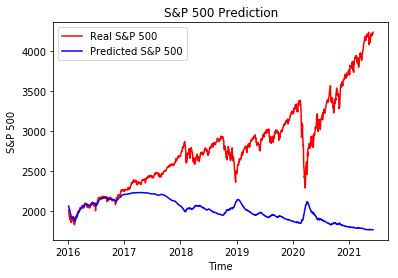

In [154]:
# Visualising the results
dates = pd.to_datetime(df["Date"])
plt.plot(dates.loc[7817:],dataset_test.values, color = 'red', label = 'Real S&P 500')
plt.plot(dates.loc[7817:],predicted_stock_price, color = 'blue', label = 'Predicted S&P 500')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.savefig("S&P 500 LSTM Prediction.png", dpi = 300)
plt.show()

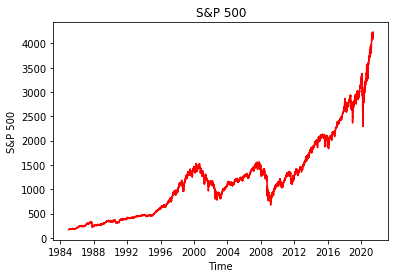

In [139]:
plt.plot(dates, df.iloc[:, 1:2], color = 'red', label = 'S&P 500')
plt.title("S&P 500")
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.savefig("S&P 500.png", dpi = 300)
plt.show()